In [176]:
import glob
from lumicks import pylake as lk
import matplotlib.pyplot as plt
import pandas as pd

dir_root = r'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\Data_Analysis\Projects\SWR1 Project\lambda nucleosome array\2020-11-21\Marker Files'+'/'
files = glob.glob(dir_root + '*Marker*.h5')
for file in files:
    print(file[len(dir_root):])

file_to_open = dir_root + input("Which file would you like:~copy and paste the file name~")


20201121-191616 Marker 1 DNA 1.h5
20201121-191619 Marker 3 DNA 2.h5
20201121-192448 Marker 5 DNA 3.h5
20201121-192451 Marker 7 DNA 4.h5
20201121-192454 Marker 13 DNA 5.h5
20201121-192456 Marker 15 DNA 6.h5
20201121-193918 Marker 19 DNA 7.h5
20201121-195458 Marker 21 DNA 8.h5
20201121-200604 Marker 23 DNA 9.h5
20201121-202356 Marker 24 DNA 10.h5
Which file would you like:~copy and paste the file name~20201121-192454 Marker 13 DNA 5.h5


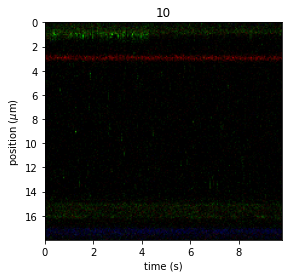

In [177]:
file = lk.File(file_to_open)
a, b, c = list(file.scans), list(file.fdcurves), list(file.kymos)
a, b, c
# file.scans[a[0]].plot_rgb()
# plt.title('SWR1 bound');

# file.fdcurves[b[0]].plot_scatter()
# plt.title('After SWR1 diffusion confirm nucleosome presence');


file.kymos[c[0]][:'10s'].plot_rgb()



## Going through Scan data

0.5271424 66.305728001


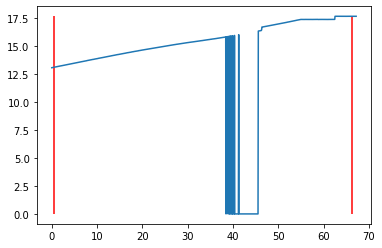

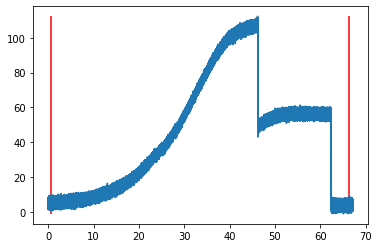

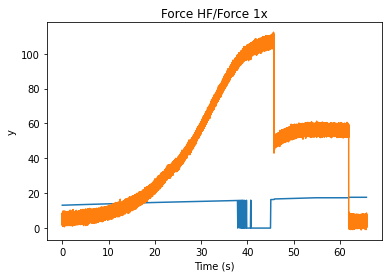

In [143]:
file = lk.File(file_to_open)
distance_time, distance_data, force_time, force_data = file["Distance"]["Distance 1"].timestamps, file["Distance"]["Distance 1"].data, file["Force HF"]["Force 1x"].timestamps,  file["Force HF"]["Force 1x"].data
a, b, c = list(file.scans), list(file.fdcurves), list(file.kymos)
scan1 = file.scans[a[0]]
start_t, stop_t = scan1.start, scan1.stop
start_t_normal, stop_t_normal = (scan1.start-distance_time[0])/1e9, (scan1.stop-distance_time[0])/1e9
print(start_t_normal, stop_t_normal)
distance_time_normal = (distance_time-distance_time[0])/1e9
force_time_normal = (force_time-force_time[0])/1e9

distance_min, distance_max = min(distance_data), max(distance_data)
force_min, force_max = min(force_data), max(force_data)

plt.plot(distance_time_normal, distance_data)
plt.vlines(start_t_normal, distance_min, distance_max, color = 'red')
plt.vlines(stop_t_normal, distance_min, distance_max, color = 'red')
plt.figure()
plt.plot(force_time_normal, force_data)
plt.vlines(start_t_normal, force_min, force_max, color = 'red')
plt.vlines(stop_t_normal, force_min, force_max, color = 'red')

plt.figure()


file["Distance"]["Distance 1"][str(start_t_normal) + 's':str(stop_t_normal)+'s'].plot()
file["Force HF"]["Force 1x"][str(start_t_normal) + 's':str(stop_t_normal)+'s'].plot()

## saving a multiframe scan

In [89]:
file = lk.File(file_to_open)
a, b, c = list(file.scans), list(file.fdcurves), list(file.kymos)
print(file.scans)
scan1 = file.scans[a[0]]
# scan1.plot_red(vmax=2)
# redimage = scan1.rgb_image
# redimage
# plt.imshow(redimage)
scan1.num_frames
scan1.export_video_red("test.gif")
# scan1.file, scan1.name, scan1.start, scan1.stop, scan1.json
# print(file)

{'13': Scan(pixels=(172, 30))}


### Unpacking json for scan data

In [90]:
file = lk.File(file_to_open)
a, b, c = list(file.scans), list(file.fdcurves), list(file.kymos)

scan1 = file.scans[a[0]]

for key, value in scan1.json.items():
    print(key,':', value, '\n')
print('\n','\n','\n')
for key, value in scan1.json["scan volume"].items():
    print(key,':', value, '\n')
print('\n','\n','\n')
for key, value in scan1.json["scan volume"]["scan axes"][0].items():
    print(key,':', value, '\n')
print('\n','\n','\n')
for key, value in scan1.json["scan volume"]["scan axes"][1].items():
    print(key,':', value, '\n')
print('\n','\n','\n')
    
scan1.json["scan volume"]["scan axes"][0]["scan width (um)"]

cereal_class_version : 1 

fluorescence : True 

force : False 

scan count : 0 

scan volume : {'center point (um)': {'x': 42.311025917934735, 'y': 46.12130548956929, 'z': 0}, 'cereal_class_version': 1, 'pixel time (ms)': 0.25, 'scan axes': [{'axis': 0, 'cereal_class_version': 1, 'num of pixels': 172, 'pixel size (nm)': 100, 'scan time (ms)': 0, 'scan width (um)': 17.233448563067654}, {'axis': 1, 'num of pixels': 30, 'pixel size (nm)': 100, 'scan time (ms)': 0, 'scan width (um)': 3}]} 


 
 

center point (um) : {'x': 42.311025917934735, 'y': 46.12130548956929, 'z': 0} 

cereal_class_version : 1 

pixel time (ms) : 0.25 

scan axes : [{'axis': 0, 'cereal_class_version': 1, 'num of pixels': 172, 'pixel size (nm)': 100, 'scan time (ms)': 0, 'scan width (um)': 17.233448563067654}, {'axis': 1, 'num of pixels': 30, 'pixel size (nm)': 100, 'scan time (ms)': 0, 'scan width (um)': 3}] 


 
 

axis : 0 

cereal_class_version : 1 

num of pixels : 172 

pixel size (nm) : 100 

scan time (ms) : 

17.233448563067654